# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [1]:
import pandas as pd
import numpy as np

In [2]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [17]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [18]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [19]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [20]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [6]:
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [15]:
df_train.duplicated().sum()

np.int64(50)

5. Check how many rows belong to each class

In [8]:
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [9]:
df_train = df_train.drop_duplicates()

7. Remove rows with NaN values

In [11]:
df_train = df_train.dropna()

8. Convert all text to lowercase

In [21]:
df_train['text'] = df_train['text'].str.lower()
df_validation['text'] = df_validation['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

9. Remove digits, URLS and special characters

In [22]:
import re
def clean_text_basic(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_train['text'] = df_train['text'].astype(str).apply(clean_text_basic)
df_validation['text'] = df_validation['text'].astype(str).apply(clean_text_basic)
df_test['text'] = df_test['text'].astype(str).apply(clean_text_basic)

10. Remove stop words

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df_train['text'] = df_train['text'].apply(remove_stopwords)
df_validation['text'] = df_validation['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


11. Use Stemming or Lemmatization

In [24]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text):
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)

df_train['clean_text'] = df_train['text'].apply(stem_text)
df_validation['clean_text'] = df_validation['text'].apply(stem_text)
df_test['clean_text'] = df_test['text'].apply(stem_text)

## C. Training your model

12. Put all text training data in variable **X_train**

In [25]:
X_train = df_train['clean_text']

13. Put all training data labels in variable **y_train**

In [26]:
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

16. Train the model using `.fit()`

In [29]:
nb.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [30]:
X_validation = df_validation['clean_text']
y_validation = df_validation['label']


X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = nb.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print("Validation Accuracy:", accuracy_score(y_validation, y_validation_pred))
print("Precision:", precision_score(y_validation, y_validation_pred))
print("Recall:", recall_score(y_validation, y_validation_pred))
print("F1 Score:", f1_score(y_validation, y_validation_pred))

Validation Accuracy: 0.83
Precision: 0.799617102744097
Recall: 0.8855123674911661
F1 Score: 0.8403755868544601


19. Create a confusion matrix using the **validation dataset**

In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_validation_pred))

Confusion Matrix:
 [[1071  314]
 [ 162 1253]]


20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [34]:
X_test = df_test['clean_text']
y_test = df_test['label']


X_test_transformed = vectorizer.transform(X_test)
y_test_pred = nb.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [35]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.8309608540925267


In [36]:
print("Precision:", precision_score(y_test, y_test_pred))

Precision: 0.7979341510652034


In [37]:
print("Recall:", recall_score(y_test, y_test_pred))

Recall: 0.8841201716738197


In [38]:
print("F1 Score:", f1_score(y_test, y_test_pred))

F1 Score: 0.8388191381065491


22. Create a confusion matrix using the **test dataset**

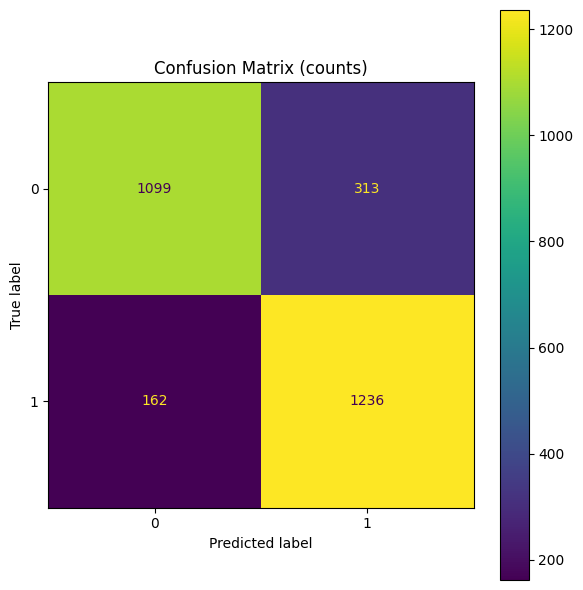

In [48]:
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, values_format='d')
ax.set_title("Confusion Matrix (counts)")
plt.tight_layout()
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [70]:
sample_non_hate = ["Mahal ko sya"]
sample_non_hate_clean = [stem_text(remove_stopwords(clean_text_basic(sample_non_hate[0].lower())))]
sample_non_hate_vec = vectorizer.transform(sample_non_hate_clean)
print("Prediction (0=non-hate, 1=hate):", nb.predict(sample_non_hate_vec)[0])

Prediction (0=non-hate, 1=hate): 0


24. Test the model by providing a hate speech input. The model should predict it as 1

In [69]:
sample_hate = ["Minura ko sya"]
sample_hate_clean = [stem_text(remove_stopwords(clean_text_basic(sample_hate[0].lower())))]
sample_hate_vec = vectorizer.transform(sample_hate_clean)
print("Prediction (0=non-hate, 1=hate):", nb.predict(sample_hate_vec)[0])

Prediction (0=non-hate, 1=hate): 1
